# Задание 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math
from sympy import *

In [7]:
x, y, p = symbols('x y p')

In [8]:
y =  x ** 2 - x + 21
print('Производная равна')
def der(y):
    return diff(y)
der(y)

Производная равна


2*x - 1

In [9]:
x, y, p = symbols('x y p')
p = (x - y) ** 2
print('Производная по x равна')
def der(p):
    return diff(p, x)
der(p)

Производная по x равна


2*x - 2*y

In [10]:
p = (x - y) ** 2
print('Производная по y равна')
def der(p):
    return diff(p, y)
der(p)

Производная по y равна


-2*x + 2*y

In [17]:
# w = naklon
# b = sdvig
# можно ввести значение n 
from sympy import symbols, Sum
n, i = symbols('n i', integer=True)
x, y_pred, y_true, w, b = symbols('x y_pred y_true w b')
y_pred = w * x + b 
MSE = 1 / n * (Sum((y_true - y_pred ) ** 2, (i, 1, n)))
MSE

Sum((-b - w*x + y_true)**2, (i, 1, n))/n

In [18]:
def der(MSE):
    return diff(MSE, w)
der(MSE)

Sum(-2*x*(-b - w*x + y_true), (i, 1, n))/n

In [19]:
def der(MSE):
    return diff(MSE, b)
der(MSE)

Sum(2*b + 2*w*x - 2*y_true, (i, 1, n))/n

In [20]:
X = np.array(
    [32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787, 55.14218841, 
     52.21179669, 39.29956669, 48.10504169, 52.55001444, 45.41973014, 54.35163488, 
     44.1640495 , 58.16847072, 56.72720806, 48.95588857, 44.68719623, 60.29732685, 
     45.61864377, 38.81681754]
)
Y = np.array(
    [31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513, 78.21151827, 
     79.64197305, 59.17148932, 75.3312423 , 71.30087989, 55.16567715, 82.47884676, 
     62.00892325, 75.39287043, 81.43619216, 60.72360244, 82.89250373, 97.37989686, 
     48.84715332, 56.87721319]
)

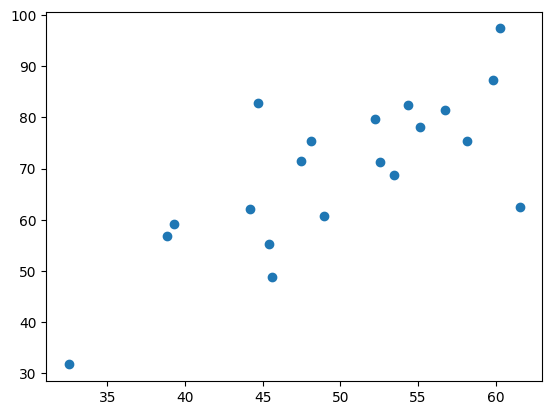

In [21]:
plt.scatter(X, Y);

In [22]:
class Gradient:

    def __init__(self, X, Y):
        self.X = X
        self.Y_true = Y

    def predict(self, w, b):
        global y_pred
        y_pred = w *self.X + b
        return y_pred

    def mse(self, y_pred):
        n = len(X)
        return(np.sum((self.Y_true - y_pred) ** 2) / n)
    
    def update(self, y_pred, w, b, a):
        n = len(self.X)
        w_new = round(w - a * (-2) * np.sum(self.X * (-y_pred + self.Y_true)) / n, 2)
        b_new = round(b - a * 2 * np.sum(y_pred - self.Y_true) / n, 2)
        return w_new, b_new

In [23]:
w = 0.5
b = 4
a = 0.0001
gradient = Gradient(X, Y)
Y_pred = gradient.predict (w, b)
mse_1 = gradient.mse(y_pred)
w_n, b_n = gradient.update(y_pred, w, b, a)

print('Y_pred =', Y_pred, sep='\n')
print('Значение MSE =', round(mse_1, 2))
print('Значение w_new =', w_n)
print('Значение b_new =', b_n)


Y_pred =
[20.25117263 30.71340201 34.76517902 27.73781982 33.90660393 31.57109421
 30.10589834 23.64978334 28.05252085 30.27500722 26.70986507 31.17581744
 26.08202475 33.08423536 32.36360403 28.47794428 26.34359811 34.14866342
 26.80932188 23.40840877]
Значение MSE = 1784.85
Значение w_new = 0.92
Значение b_new = 4.01


In [24]:
class GradientDescent(Gradient):

    def __init__(self, X, Y):
        self.X = X
        self.Y_true = Y
        pass

    def optimize(self, y_pred, num_iterations, a):                 
        mse_new = super().mse(y_pred)
        w_new, b_new = super().update(y_pred, w, b, a)
        y_pred_new = super().predict (w_new, b_new)
        mse_super_new = super().mse(y_pred_new)
        for _ in range (num_iterations):
            while abs(mse_super_new - mse_new) > stopping_threshold:
                y_pred_new = super().predict (w_new, b_new)
                w_new, b_new = super().update(y_pred_new, w_new, b_new, a)
                mse_super_new = mse_new
                mse_new = super().mse(y_pred_new)
        return (w_new, b_new, mse_new)

In [25]:
num_iterations = 1
stopping_threshold = 0.001
a = 0.0001
w = 0.5
b = 4
gradient_descent = GradientDescent(X, Y)

w_l, b_l, sttr_l = gradient_descent.optimize(y_pred, num_iterations, a)
print('Финальное значение w:', w_l)
print('Финальное значение b:', b_l)
print('Финальное значение mse:', sttr_l)

Финальное значение w: 1.31
Финальное значение b: 4.01
Финальное значение mse: 99.30624310479641
